## **Digit Recognizer**

**Loading MNIST Digits Dataset**

In [15]:
from tensorflow import keras
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")


In [16]:
# Training and Testing Data  
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [17]:
# Considering single image:
x_train[0].shape

(28, 28)

In [18]:
y_train # having shape of 60000

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

5


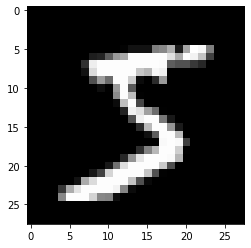

In [19]:
plt.imshow(x_train[0],cmap='gray')
print(y_train[0])

## **Problem & Neural Network Architecture Description**

    Multi Classification Problem:
    * o/p Categories : 10
    * Activation Fxn :  output : softmax
    * Loss Fxn : Sparse Categorical Cross entropy
                As our y_train or output not in one-hot encoding form rather it is in integer.
    * Architecture : Input : Flatten
                     Hidden : 400
                     output : 10

## **Model Architecture**

In [20]:
from keras.layers import Dropout
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(400,activation ='relu'))
model.add(keras.layers.Dense(10,activation ='softmax'))

In [21]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 6.9693 - accuracy: 0.8631 - val_loss: 0.3703 - val_accuracy: 0.9287
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3223 - accuracy: 0.9350 - val_loss: 0.3282 - val_accuracy: 0.9333
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2631 - accuracy: 0.9432 - val_loss: 0.2942 - val_accuracy: 0.9330
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2560 - accuracy: 0.9436 - val_loss: 0.2843 - val_accuracy: 0.9464
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2283 - accuracy: 0.9523 - val_loss: 0.2687 - val_accuracy: 0.9494
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2181 - accuracy: 0.9526 - val_loss: 0.3382 - val_accuracy: 0.9451
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1993 - accuracy: 0.9570 - val_loss: 0.3533 - val_accuracy:

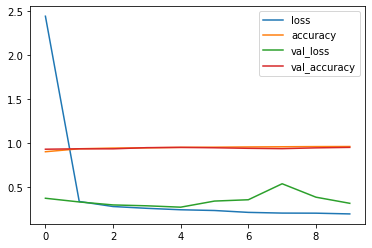

In [23]:
import pandas as pd
loss = pd.DataFrame(model.history.history)
loss.plot()

In [24]:
import numpy as np
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis = 1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [25]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [26]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_pred,y_test)*100

94.96

In [27]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       967
           1       0.98      0.98      0.98      1133
           2       0.96      0.94      0.95      1060
           3       0.93      0.96      0.94       975
           4       0.96      0.95      0.95       992
           5       0.91      0.98      0.94       831
           6       0.97      0.96      0.97       969
           7       0.95      0.97      0.96      1004
           8       0.94      0.87      0.90      1051
           9       0.93      0.92      0.93      1018

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [28]:
model.save('Digit_Recognizer.hdf5')

## Accuracy with different Architecture
    Model above : 94%
    Model with Dropout : 88.6 %